## importing 

In [1]:
import pandas as pd
df = pd.read_csv('feat_eng_arahar.csv')
df = df.drop(columns=['Unnamed: 0'])
X=df.iloc[:,:6]
Y=df.iloc[:,6]
import evalml
X_train , X_test , Y_train , Y_test = evalml.preprocessing.split_data(X, Y , problem_type='regression')
Y

0        3
1        2
2        3
3        2
4        1
        ..
12449    3
12450    1
12451    1
12452    3
12453    3
Name: Label, Length: 12454, dtype: int64

## Correlation

In [2]:
from scipy.stats import pearsonr
list2 = df["Label"]
list1 = df["Eccentricity"]
corr, _ = pearsonr(list1, list2)
print('Pearsons correlation for eccentricity: %.3f' % corr)
list1 = df["eccen_mean"]
corr, _ = pearsonr(list1, list2)
print('Pearsons correlation for mean eccentricity: %.3f' % corr)
list1 = df["MinbyMaj"]
corr, _ = pearsonr(list1, list2)
print('Pearsons correlation for MinbyMaj: %.3f' % corr)
list1 = df["minby_mean"]
corr, _ = pearsonr(list1, list2)
print('Pearsons correlation for minby_mean: %.3f' % corr)
list1 = df["area"]
corr, _ = pearsonr(list1, list2)
print('Pearsons correlation for area: %.3f' % corr)
list1 = df["area_mean"]
corr, _ = pearsonr(list1, list2)
print('Pearsons correlation for area_mean: %.3f' % corr)

Pearsons correlation for eccentricity: 0.917
Pearsons correlation for mean eccentricity: 0.950
Pearsons correlation for MinbyMaj: -0.952
Pearsons correlation for minby_mean: -0.967
Pearsons correlation for area: -0.782
Pearsons correlation for area_mean: -0.833


In [3]:
X_train.head()

,Eccentricity,eccen_mean,MinbyMaj,minby_mean,area,area_mean
1233,0.96,0.96,0.29,0.27,7.700,6.63
7028,0.76,0.78,0.65,0.61,15.950,16.05
4890,0.95,0.95,0.31,0.30,6.470,8.02
4818,0.89,0.90,0.46,0.43,10.405,9.38
5762,0.62,0.52,0.78,0.84,12.840,15.25


In [4]:
Y_train.head()

1233    3
7028    2
4890    3
4818    3
5762    1
Name: Label, dtype: int64

## model finding

In [5]:
from evalml.automl import AutoMLSearch
automl = AutoMLSearch(X_train=X_train , y_train=Y_train , problem_type = 'regression' , verbose=True)
automl.search()
automl.rankings

Using default limit of max_batches=4.


*****************************
* Beginning pipeline search *
*****************************

Optimizing for R2. 
Greater score is better.

Using SequentialEngine to train and score pipelines.
Searching up to 4 batches for a total of None pipelines. 
Allowed model families: 



FigureWidget({
    'data': [{'mode': 'lines+markers',
              'name': 'Best Score',
              'type'…

Evaluating Baseline Pipeline: Mean Baseline Regression Pipeline
Mean Baseline Regression Pipeline:
	Starting cross validation
	Finished cross validation - mean R2: -0.000

*****************************
* Evaluating Batch Number 1 *
*****************************

Elastic Net Regressor w/ Imputer + Standard Scaler:
	Starting cross validation
	Finished cross validation - mean R2: 0.938
Random Forest Regressor w/ Imputer:
	Starting cross validation
	Finished cross validation - mean R2: 0.999

*****************************
* Evaluating Batch Number 2 *
*****************************

Elastic Net Regressor w/ Imputer + Standard Scaler + RF Regressor Select From Model:
	Starting cross validation
	Finished cross validation - mean R2: 0.937
Random Forest Regressor w/ Imputer + RF Regressor Select From Model:
	Starting cross validation
	Finished cross validation - mean R2: 0.999

*****************************
* Evaluating Batch Number 3 *
*****************************

Decision Tree Regressor w/ 

c:\users\rocks\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.390e-01, tolerance: 4.336e-01

c:\users\rocks\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.021e-01, tolerance: 4.415e-01



Stacked Ensemble Regression Pipeline:
	Starting cross validation
	Finished cross validation - mean R2: 0.999

Search finished after 00:13            
Best pipeline: Random Forest Regressor w/ Imputer
Best pipeline R2: 0.999225


,id,pipeline_name,search_order,mean_cv_score,standard_deviation_cv_score,validation_score,percent_better_than_baseline,high_variance_cv,parameters
0,2,Random Forest Regressor w/ Imputer,2,0.999225,0.000349,0.999225,359305.180832,False,{'Imputer': {'categorical_impute_strategy': 'm...
1,10,Stacked Ensemble Regression Pipeline,10,0.999197,0.000382,0.999197,359295.140910,False,{'Linear Pipeline - Imputer': {'categorical_im...
2,6,Extra Trees Regressor w/ Imputer + Select Colu...,6,0.999183,0.000341,0.999183,359290.160376,False,{'Imputer': {'categorical_impute_strategy': 'm...
3,4,Random Forest Regressor w/ Imputer + RF Regres...,4,0.999116,0.000459,0.999116,359265.906936,False,{'Imputer': {'categorical_impute_strategy': 'm...
4,7,XGBoost Regressor w/ Imputer + Select Columns ...,7,0.999052,0.000680,0.999052,359242.969721,False,{'Imputer': {'categorical_impute_strategy': 'm...
5,5,Decision Tree Regressor w/ Imputer + Select Co...,5,0.998614,0.000975,0.998614,359085.475167,False,{'Imputer': {'categorical_impute_strategy': 'm...
6,9,LightGBM Regressor w/ Imputer + Select Columns...,9,0.984112,0.000408,0.984112,353872.151429,False,{'Imputer': {'categorical_impute_strategy': 'm...
7,1,Elastic Net Regressor w/ Imputer + Standard Sc...,1,0.938486,0.002069,0.938486,337470.618573,False,{'Imputer': {'categorical_impute_strategy': 'm...
8,3,Elastic Net Regressor w/ Imputer + Standard Sc...,3,0.937075,0.002047,0.937075,336963.102654,False,{'Imputer': {'categorical_impute_strategy': 'm...
9,8,CatBoost Regressor w/ Imputer + Select Columns...,8,0.453001,0.000730,0.453001,162946.531637,False,{'Imputer': {'categorical_impute_strategy': 'm...


Set max_iter to a larger value. The default is 1000. This should be your last resort. If the optimization process does not converge within the first 1000 iterations, having it converge by setting a larger max_iter typically masks other problems such as those described in 1) and 2). It might even indicate that you have some in appropriate features or strong correlations in the features. Debug those first before taking this easy way out.

## Evaluation of model 

In [6]:
best_pipeline=automl.best_pipeline
automl.describe_pipeline(automl.rankings.iloc[0]["id"])


**************************************
* Random Forest Regressor w/ Imputer *
**************************************

Problem Type: regression
Model Family: Random Forest

Pipeline Steps
1. Imputer
	 * categorical_impute_strategy : most_frequent
	 * numeric_impute_strategy : mean
	 * categorical_fill_value : None
	 * numeric_fill_value : None
2. Random Forest Regressor
	 * n_estimators : 100
	 * max_depth : 6
	 * n_jobs : -1

Training
Training for regression problems.
Total training time (including CV): 0.7 seconds

Cross Validation
----------------
               R2  ExpVariance  MaxError  MedianAE   MSE   MAE  Root Mean Squared Error # Training # Validation
0           0.999        0.999     1.000     0.000 0.001 0.001                    0.027      6,642        3,321
1           0.999        0.999     1.000     0.000 0.001 0.001                    0.024      6,642        3,321
2           1.000        1.000     0.890     0.000 0.000 0.000                    0.016      6,642        3

## regression params 

In [7]:
best_pipeline.score(X_test, Y_test , objectives=["r2","mae","mse"])
# evalml.objectives.get_all_objective_names()

OrderedDict([('R2', 0.9990335950379989),
             ('MAE', 0.0009651411748962935),
             ('MSE', 0.0006383749553949778)])

## model saving

In [8]:
best_pipeline.save('feat_eng_arahar.joblib')

# import numpy as np
# import joblib

# model = joblib.load("feat_eng_channa.pkl")
# val = np.array([[0.76,0.74,0.47,0.58]])
# df = pd.DataFrame(val, columns = ['Eccentricity','eccen_mean','MinbyMaj','minby_mean'])
# df.iloc[[0]]
# # x_pred = np.array(x_pred)
# daalpredictions = model.predict(df.iloc[[0]])
# # from joblib import dump, load
# # dump(model, 'Model.joblib') 
# # import numpy as np
# # best_pipeline.fit(X_train, Y_train)

# # from sklearn.metrics import mean_squared_error
# # daalpredictions = best_pipeline.predict()

# # mse = mean_squared_error(np.ravel(Y_test), np.ravel(daalpredictions))
# # rmse = np.sqrt(mse)
# print(daalpredictions)
# # by = np.ravel([0.93,0.92,0.37,0.38])
# # vy = best_pipeline.predict(by)

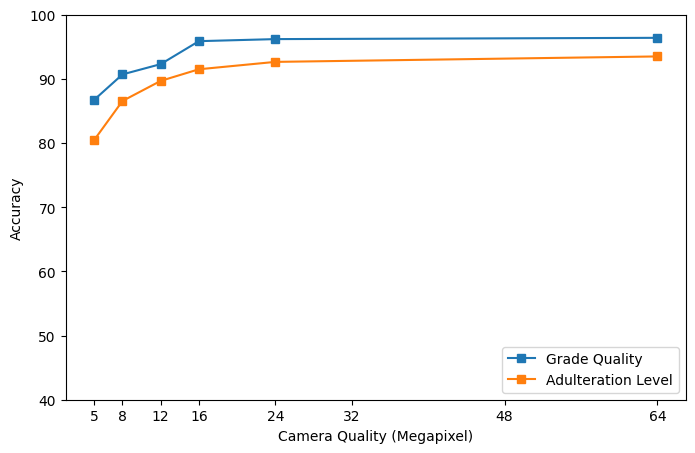

In [46]:
import numpy as np
import matplotlib.pyplot as plt



plt.figure(figsize=(8, 5))

 
accs = np.array([86.69, 90.7, 92.3, 95.88, 96.2, 96.4])
mp = np.array([5, 8, 12, 16, 24, 64])
plt.ylim(40, 100)
plt.xticks([5, 8, 12, 16, 24, 32, 48, 64])
plt.ylabel('Accuracy')
plt.xlabel('Camera Quality (Megapixel)')

plt.plot(mp, accs, marker = 's')

accs = np.array([80.4, 86.56, 89.69, 91.5, 92.65, 93.5 ])
mp = np.array([5, 8, 12, 16, 24, 64])
plt.ylim(40, 100)
plt.xticks([5, 8, 12, 16, 24, 32, 48, 64])
plt.ylabel('Accuracy')
plt.xlabel('Camera Quality (Megapixel)')

plt.plot(mp, accs, marker = 's')
plt.legend(['Grade Quality','Adulteration Level'], loc = 4)
plt.savefig('phone comparison.pdf')

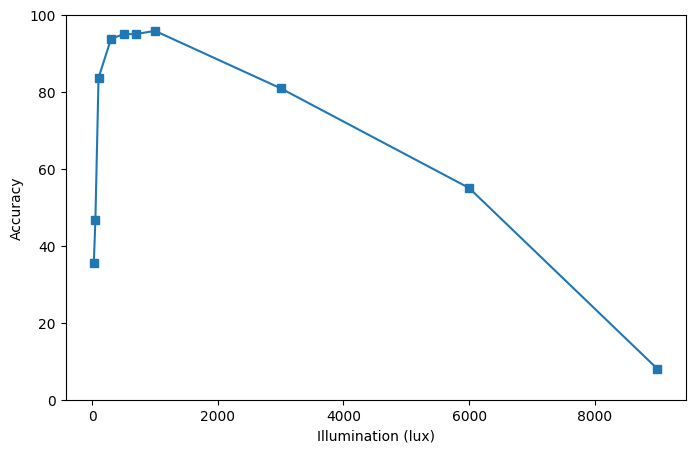

In [2]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(8, 5))

 
accs = np.array([35.6, 46.8, 83.6, 93.8, 94.9, 95.0, 95.8, 80.89, 55, 8])
mp = np.array([25, 50, 100, 300, 500, 700, 1000, 3000, 6000, 9000])
plt.ylim(0, 100)
# plt.xticks([5, 8, 12, 16, 24, 32, 48, 64])
# plt.xticks([50, 300, 500, 700, 1000, 1500])
plt.ylabel('Accuracy')
plt.xlabel('')

plt.plot(mp, accs, marker = 's')
plt.xlabel('Illumination (lux)')

# accs = np.array([80.4, 86.56, 89.69, 91.5, 92.65, 93.5 ])
# mp = np.array([5, 8, 12, 16, 24, 64])
# plt.ylim(40, 100)
# plt.xticks([5, 8, 12, 16, 24, 32, 48, 64])
# plt.ylabel('Accuracy')
# plt.xlabel('Camera Quality (Megapixel)')

# plt.plot(mp, accs, marker = 's')
# plt.legend(['Grade Quality','Adulteration Level'], loc = 4)
plt.savefig('Light comparison.pdf')

In [26]:
accs

array([35.6 , 46.8 , 83.6 , 93.8 , 94.9 , 95.  , 95.8 , 80.89, 55.  ,
        8.  ])

In [7]:
import time
import joblib
import numpy as np

In [4]:
model = joblib.load('Model.joblib')

c:\Users\rocks\anaconda3\envs\test\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 1.0.2 when using version 1.1.3. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\rocks\anaconda3\envs\test\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator RandomForestRegressor from version 1.0.2 when using version 1.1.3. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [8]:
X= np.zeros((256,256))
model.predict(X)

c:\Users\rocks\anaconda3\envs\test\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


ValueError: X has 256 features, but RandomForestRegressor is expecting 6 features as input.

In [13]:
start = time.time()
! python G1run.py   
end= time.time()
print(end-start)

1.62166166305542
